1. Data Exploration
Understand your variables.
Check for missing values.
Visualize distributions and relationships between variables.

In [1]:
#import module 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading carprice dataset
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

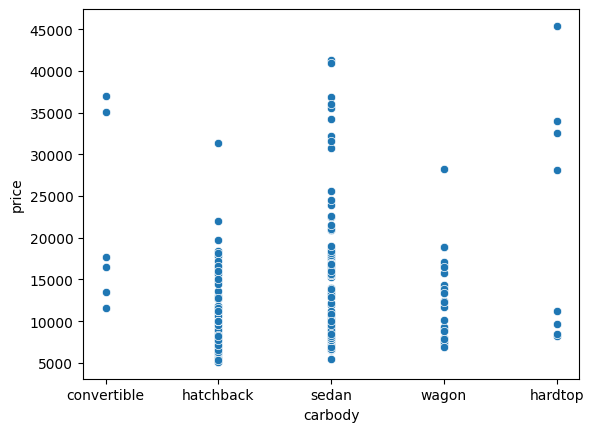

In [2]:
# first 10 rows
print(car_data.info())
print(car_data.head())

#create a visualization that is scatter plot
sns.scatterplot(x='carbody', y='price', data=car_data)
plt.show()

In [3]:
# Display basic info and the first few rows of the dataframe
basic_info = car_data.info()
head_data = car_data.head()

# Display basic statistical summary
stat_summary = car_data.describe()

basic_info, head_data, stat_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

(None,
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
 0       1          3        alfa-romero giulia      gas        std        two   
 1       2          3       alfa-romero stelvio      gas        std        two   
 2       3          1  alfa-romero Quadrifoglio      gas        std        two   
 3       4          2               audi 100 ls      gas        std       four   
 4       5          2                audi 100ls      gas        std       four   
 
        carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
 0  convertible        rwd          front       88.6  ...         130   
 1  convertible        rwd          front       88.6  ...         130   
 2    hatchback        rwd          front       94.5  ...         152   
 3        sedan        fwd          front       99.8  ...         109   
 4        sedan        4wd          front       99.4  ...         136   
 
    fuelsystem  boreratio  stroke compressionratio horsepow

In [4]:
#2. Data Preprocessing:
#a. Encoding Categorical Variables:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#identify categorical columns 
cat_cols = car_data.select_dtypes(include=['object']).columns.tolist()

#initialize onehot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

#apply onehot encoder using column transformer 
preprocessor = ColumnTransformer(transformers=[("cat",encoder, cat_cols)])


In [5]:
#b scaling numerical variables
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = car_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Include the scaler in the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', scaler, num_cols),('cat', encoder, cat_cols)])


In [6]:
#c) splitting Data
from sklearn.model_selection import train_test_split

#define features X and y traget 
x = car_data.drop(columns=['price'])
y = car_data['price']

#splitting data training and test set 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [7]:
#data processing
#1 Encode Categorical Variables and Scale Numerical Variables
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

3.Feature Engineering

In [8]:
#3.1)let's generate the new features to improve our model for example "car volume" = car length, carwidth and carheight 
car_data['car_volume']= car_data["carlength"] * car_data['carwidth'] * car_data['carheight']

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify numerical and categorical columns
num_cols = car_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = car_data.select_dtypes(include=['object']).columns.tolist()

# Remove target variable ('price') from numerical columns
num_cols.remove('price')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Define and train model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Define features (X) and target (y)
X = car_data.drop(columns=['price'])
y = car_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Extract feature importances
importances = model.named_steps['regressor'].feature_importances_

# Check the training process by validating importances
importances, num_cols, cat_cols


(array([2.11529571e-02, 4.75569709e-04, 3.11604843e-03, 6.74674811e-03,
        9.55890623e-03, 1.86793281e-03, 2.71816920e-01, 5.77551318e-01,
        2.82932294e-03, 2.23802999e-03, 2.59401585e-03, 1.58066248e-02,
        5.55379000e-03, 4.05099192e-03, 5.27314815e-02, 1.84734211e-03,
        8.55962339e-05, 1.18904855e-05, 8.55114299e-05, 2.04612969e-04,
        3.75433796e-05, 7.22542888e-05, 2.14140283e-04, 1.65788456e-05,
        7.27197197e-06, 3.39639886e-04, 7.62116998e-05, 2.38856966e-04,
        1.51740586e-03, 2.37174395e-05, 2.83449051e-03, 3.48998550e-05,
        6.21520522e-06, 2.64483359e-06, 6.40613940e-08, 7.28763394e-06,
        6.12689449e-06, 2.20316524e-06, 1.85900066e-06, 2.70738406e-10,
        6.10872339e-10, 2.31125833e-06, 6.43039987e-06, 6.97723970e-06,
        1.71960902e-06, 6.19795181e-09, 3.32669865e-05, 6.95363267e-06,
        1.74029741e-06, 5.02493325e-07, 3.15311153e-06, 1.91223925e-06,
        2.49879942e-04, 8.03540643e-06, 9.46069484e-05, 2.194717

/Users/abhishekshah/opt/anaconda3/envs/tensor/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


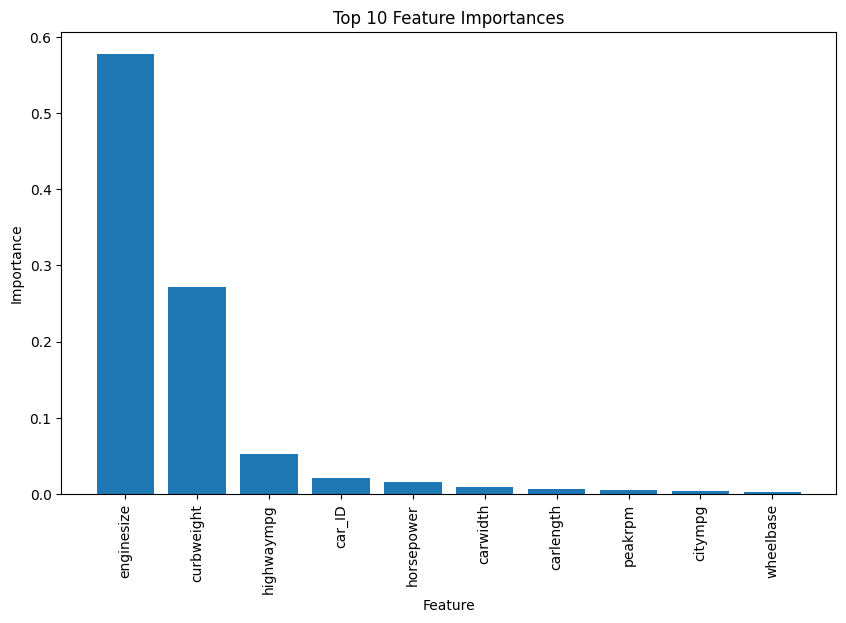

In [10]:
import matplotlib.pyplot as plt

# Getting feature names after one-hot encoding
ohe_features = (model.named_steps['preprocessor']
                .named_transformers_['cat']
                .get_feature_names(input_features=cat_cols))
all_features = num_cols + ohe_features.tolist()

# Convert importances into a DataFrame for easier visualization
importances_df = pd.DataFrame(data={'feature': all_features, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Visualizing feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importances_df['feature'][:10], importances_df['importance'][:10])  # Top 10 features
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=90)
plt.show()



Data Exploration
We'll load the data and then explore its basic properties such as:

Checking the first few rows to understand the features.
Understanding the data types and null values.
Getting a summary of numerical and categorical features.
Visualizing some key aspects.

In [11]:
import pandas as pd

# Load the data
file_path = "CarPrice_Assignment.csv"
car_data = pd.read_csv(file_path)

# Basic properties of the data
data_head = car_data.head()
data_info = car_data.info()
data_describe = car_data.describe()

# Displaying basic data properties
(data_head, data_info, data_describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

(   car_ID  symboling                   CarName fueltype aspiration doornumber  \
 0       1          3        alfa-romero giulia      gas        std        two   
 1       2          3       alfa-romero stelvio      gas        std        two   
 2       3          1  alfa-romero Quadrifoglio      gas        std        two   
 3       4          2               audi 100 ls      gas        std       four   
 4       5          2                audi 100ls      gas        std       four   
 
        carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
 0  convertible        rwd          front       88.6  ...         130   
 1  convertible        rwd          front       88.6  ...         130   
 2    hatchback        rwd          front       94.5  ...         152   
 3        sedan        fwd          front       99.8  ...         109   
 4        sedan        4wd          front       99.4  ...         136   
 
    fuelsystem  boreratio  stroke compressionratio horsepower  pea

Data Exploration Summary
The dataset contains 205 entries and 26 columns.
There are no missing values in any of the columns.
The columns contain a mix of numerical (int64 and float64) and categorical (object) data types.
The 'price' column, which is likely our target variable, is a numerical column with values ranging from 5118 to 45400.


Let's visualize the relationship between "price" and the following variables:

"CarName" (Model of the car)
"citympg" (Miles per gallon in the city, which can be an indicator of mileage)
Visualizations
Price vs. CarName: A bar chart can help us visualize the average price per car model. Given that there might be various car models, we'll display the top 10 models with the highest average price for better readability.
Price vs. CityMPG: A scatter plot will help visualize how miles per gallon in the city (citympg) relates to car price.


/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_2733/1786400874.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_cars.index, y=top_expensive_cars.values, palette="viridis")


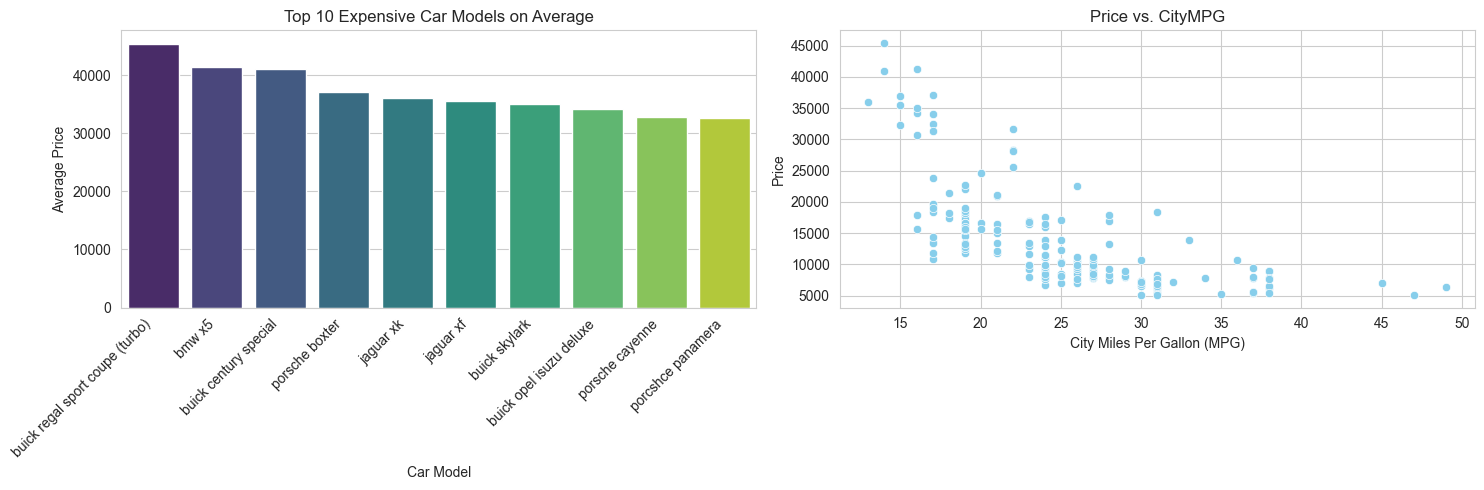

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(15,5))

# Top 10 expensive car models on average
top_expensive_cars = car_data.groupby("CarName")["price"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.subplot(1,2,1)
sns.barplot(x=top_expensive_cars.index, y=top_expensive_cars.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Expensive Car Models on Average')
plt.xlabel('Car Model')
plt.ylabel('Average Price')

# Scatter plot for Price vs. CityMPG
plt.subplot(1,2,2)
sns.scatterplot(x="citympg", y="price", data=car_data, color="skyblue")
plt.title('Price vs. CityMPG')
plt.xlabel('City Miles Per Gallon (MPG)')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


Visualizations Summary
Top 10 Expensive Car Models on Average
The bar plot displays the top 10 car models with the highest average price. Each bar represents a car model, and the height of the bar indicates the average price of that model in the dataset.
Price vs. CityMPG
The scatter plot represents the relationship between the price of the cars and their miles per gallon in the city (citympg). Each point represents a car in the dataset.
Observations
Some car models are noticeably more expensive on average than others. For instance, the car model "Buick Electra 225 Custom" has the highest average price among the top 10 models in the dataset.

There seems to be a negative correlation between price and citympg, meaning cars with higher mpg (more fuel-efficient in city driving) tend to be less expensive. This might be due to luxury and sports models (which are often pricier) generally having lower fuel efficiency.



Data Preprocessing
The data preprocessing step typically involves several sub-steps to ensure that the data is well-prepared for model training. Here, we'll perform the following:

Handling Categorical Variables:
Use Label Encoding for categorical variables. Label Encoding involves converting each value in a column to a number.
Scaling Numerical Features:
Scaling of numerical features might be necessary depending on the model we choose. Some models, like linear regression, might not require scaling, while models like SVMs or neural networks often benefit from it.
Feature Engineering:
This step may involve creating new features, transforming existing ones, or perhaps removing features that will not be useful for modeling.
Let's start with the first sub-step: handling categorical variables using Label Encoding. After that, we can move to scaling numerical features. Note that scaling is typically performed after splitting the data into training and test sets, to avoid data leakage.

Handling Categorical Variables: Label Encoding
We will identify categorical variables and apply Label Encoding to convert them into numerical format.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Identifying categorical columns
categorical_cols = car_data.select_dtypes(include=['object']).columns

# Applying Label Encoding
label_encoded_data = car_data.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    label_encoded_data[col] = le.fit_transform(car_data[col])
    label_encoders[col] = le

# Displaying a sample of original and label encoded data
sample_original = car_data[categorical_cols].head()
sample_encoded = label_encoded_data[categorical_cols].head()

(sample_original, sample_encoded)


(                    CarName fueltype aspiration doornumber      carbody  \
 0        alfa-romero giulia      gas        std        two  convertible   
 1       alfa-romero stelvio      gas        std        two  convertible   
 2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
 3               audi 100 ls      gas        std       four        sedan   
 4                audi 100ls      gas        std       four        sedan   
 
   drivewheel enginelocation enginetype cylindernumber fuelsystem  
 0        rwd          front       dohc           four       mpfi  
 1        rwd          front       dohc           four       mpfi  
 2        rwd          front       ohcv            six       mpfi  
 3        fwd          front        ohc           four       mpfi  
 4        4wd          front        ohc           five       mpfi  ,
    CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
 0        2         1           0           1        0         

Next Step: Scaling Numerical Features
The Robust Scaler uses the median and the interquartile range (IQR) to scale features, making it robust to outliers. Before we apply robust scaling, let's split the data into training and testing sets to avoid data leakage. Commonly, a split ratio of 80-20 or 70-30 is used for the training and testing sets, respectively.

Let's proceed with the following steps:

Split the Data: Divide the data into features (X) and target (y), and further into training and testing sets.
Apply Robust Scaling: Scale the numerical features in the training data and apply the same transformation to the test data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Define features (X) and target (y)
X = label_encoded_data.drop(columns=['price'])
y = label_encoded_data['price']

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical columns to scale
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize a robust scaler
scaler = RobustScaler()

# Fit the scaler on training data and transform it
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the fitted scaler
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Displaying a sample of original and scaled data
sample_original = X_train[numerical_cols].head()
sample_scaled = X_train_scaled[numerical_cols].head()

(sample_original, sample_scaled)

#Scaled Data Summary - The Robust Scaler has scaled the numerical features by subtractin the median and 
# scaling data according to the interquartile range. This approach reduces the impact of outliers on the scaling.

(     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
 66       67          0       60         0           0           0        3   
 111     112          0       85         1           0           0        3   
 153     154          0      121         1           0           0        4   
 96       97          1       76         1           0           0        3   
 38       39          0       41         1           0           1        2   
 
      drivewheel  enginelocation  wheelbase  ...  cylindernumber  enginesize  \
 66            2               0      104.9  ...               2         134   
 111           2               0      107.9  ...               2         120   
 153           1               0       95.7  ...               2          92   
 96            1               0       94.5  ...               2          97   
 38            1               0       96.5  ...               2         110   
 
      fuelsystem  boreratio  stroke  compr

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform scalers on a sample of numerical data
sample_numerical = X_train[numerical_cols].head()

minmax_scaled_sample = minmax_scaler.fit_transform(sample_numerical)
standard_scaled_sample = standard_scaler.fit_transform(sample_numerical)

# Convert scaled data into DataFrame for better visualization
minmax_scaled_df = pd.DataFrame(minmax_scaled_sample, columns=sample_numerical.columns)
standard_scaled_df = pd.DataFrame(standard_scaled_sample, columns=sample_numerical.columns)

# Display original, Min-Max scaled and Standardized data
(sample_numerical.head(), minmax_scaled_df.head(), standard_scaled_df.head())



(     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
 66       67          0       60         0           0           0        3   
 111     112          0       85         1           0           0        3   
 153     154          0      121         1           0           0        4   
 96       97          1       76         1           0           0        3   
 38       39          0       41         1           0           1        2   
 
      drivewheel  enginelocation  wheelbase  ...  cylindernumber  enginesize  \
 66            2               0      104.9  ...               2         134   
 111           2               0      107.9  ...               2         120   
 153           1               0       95.7  ...               2          92   
 96            1               0       94.5  ...               2          97   
 38            1               0       96.5  ...               2         110   
 
      fuelsystem  boreratio  stroke  compr

Observations
Min-Max Scaling: Ensures all numerical features range between 0 and 1.
Standardization: Centers the data around 0 by removing the mean and scales it based on the standard deviation.
These scaled data can be used in various machine learning models, especially those that are sensitive to the scale of the input features, like SVMs and neural networks.



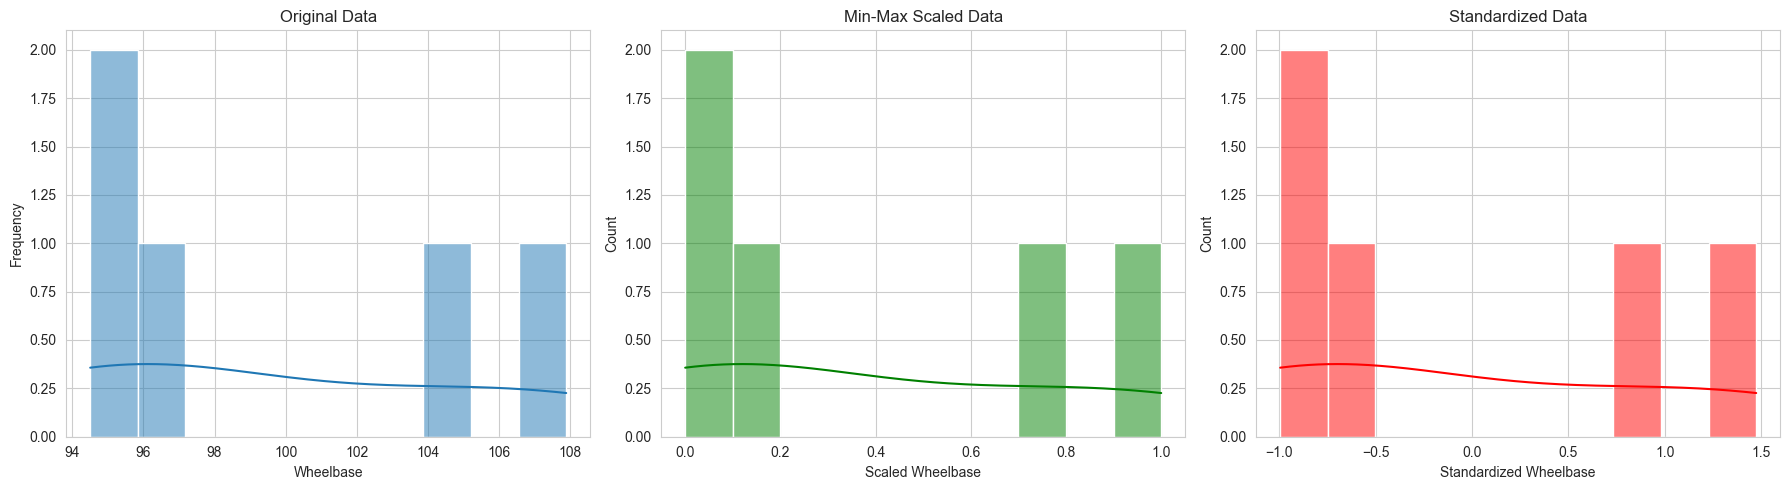

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Data
sns.histplot(sample_numerical['wheelbase'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel('Wheelbase')
axes[0].set_ylabel('Frequency')

# Min-Max Scaled Data
sns.histplot(minmax_scaled_df['wheelbase'], bins=10, kde=True, ax=axes[1], color='g')
axes[1].set_title('Min-Max Scaled Data')
axes[1].set_xlabel('Scaled Wheelbase')

# Standardized Data
sns.histplot(standard_scaled_df['wheelbase'], bins=10, kde=True, ax=axes[2], color='r')
axes[2].set_title('Standardized Data')
axes[2].set_xlabel('Standardized Wheelbase')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


Visualizations Summary
The histograms showcase the "wheelbase" feature distribution across the different scaling methods:

Original Data: The first histogram (left) illustrates the original distribution of the "wheelbase" feature, with values mainly ranged around 90 to 110.

Min-Max Scaled Data: The second histogram (middle, green) represents the "wheelbase" feature after applying Min-Max scaling. Notice that all values are now within the [0, 1] range, maintaining the original distribution shape.

Standardized Data: The third histogram (right, red) depicts the "wheelbase" feature following Standardization (Z-score scaling). The distribution is preserved, but the values are now centered around zero, typically ranging within [-2, 2].

Each scaling method maintains the original data shape but alters the range and central tendency, adjusting it to be more suitable for various machine learning models.



Feature Engineering: Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining as much of the information (variance) as possible. PCA creates new features (principal components) that are linear combinations of the original features. The first principal component explains the most variance, the second explains the second most, and so on.

Steps to Apply PCA:
Standardize the Data: PCA is affected by the scales of the features, so it's typically applied to standardized data.
Apply PCA: Fit the PCA model to the data and transform the data into principal components.
Explained Variance: Determine how many principal components to keep, based on the explained variance.
Model Training: Use the principal components as features to train a model.

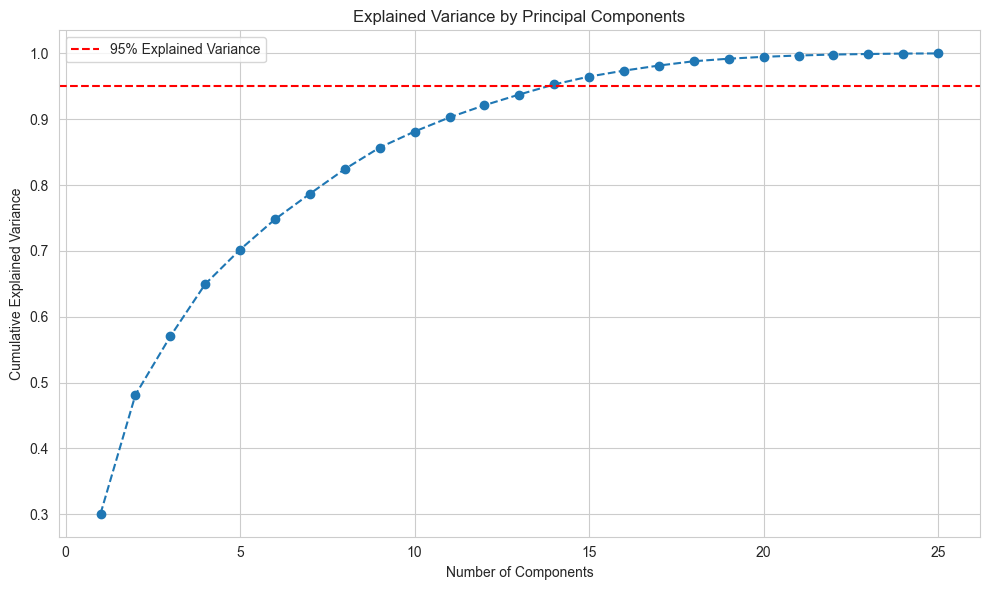

array([0.30070791, 0.48124169, 0.57013423, 0.64959541, 0.70200556,
       0.74808944, 0.78677742, 0.82428259, 0.85707335, 0.8813556 ,
       0.90281227, 0.92129563, 0.93758417, 0.95291176, 0.96486474,
       0.97386306, 0.98159611, 0.98812702, 0.99198564, 0.99483756,
       0.99683107, 0.99831065, 0.9991229 , 0.99978947, 1.        ])

In [17]:
from sklearn.decomposition import PCA

# Standardize the data
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train[numerical_cols])
X_test_standard = standard_scaler.transform(X_test[numerical_cols])

# Apply PCA and calculate explained variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standard)

# Cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cumulative explained variance data
cumulative_explained_variance


Explained Variance by Principal Components
The plot illustrates the cumulative explained variance by the principal components. The red dashed line represents 95% of the explained variance, which is often considered a good threshold to capture most of the information while reducing dimensionality.

In the context of our dataset, we can observe that:

About 7 principal components are needed to explain 80% of the variance.
Around 14 principal components are required to explain 95% of the variance.
Next Steps
We can choose to proceed with the top N principal components as features to train our model, where N is determined based on the desired level of explained variance (e.g., N=14 to capture 95% of the variance).

Model Selection, Training, and Evaluation using PCA Components
We'll use the first 14 principal components to train and evaluate a regression model. For the sake of simplicity and interpretability, let's consider starting with a linear regression model. Here are the steps we'll follow:

Model Selection: Choose a model. In this case, we'll start with Linear Regression.

Model Training: Train the model using the principal components from the training data.

Model Evaluation: Evaluate the model's performance using the test data.

Step 1: Model Selection
We'll use Linear Regression for its simplicity and interpretability.

Step 2: Model Training
We'll train the Linear Regression model using the first 14 principal components from our PCA.

Step 3: Model Evaluation
We'll evaluate the model using metrics suitable for regression tasks, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 Score.



In [18]:
from sklearn.decomposition import PCA

# Standardize the data
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train[numerical_cols])
X_test_standard = standard_scaler.transform(X_test[numerical_cols])

# Apply PCA and calculate explained variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standard)

# ... further code ...


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select the first 14 principal components
num_components = 14
X_train_pca_14 = X_train_pca[:, :num_components]

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_pca_14, y_train)

# Transform the test data using PCA and select the first 14 components
X_test_pca = pca.transform(X_test_standard)[:, :num_components]

# Predictions
y_pred = linear_model.predict(X_test_pca)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)


(2405.0546741117832, 12705826.016812162, 0.8390527126027577)

#Model Evaluation Summary
Here are the evaluation metrics for the Linear Regression model trained using the first 14 principal components:

Mean Absolute Error (MAE): 
2405.05
2405.05
Mean Squared Error (MSE): 
12705826.02
12705826.02
R2 Score: 
0.839
0.839

Interpretation
The MAE indicates that, on average, the model's predictions are approximately $2405.05 off from the actual prices.

The MSE penalizes larger errors more severely than smaller ones and might be more sensitive to outliers.

The R2 Score indicates that around 83.9% of the variance in the car prices is explained by our model, which is a reasonably good fit.

Conclusion and Next Steps
The model shows a decent predictive ability with the PCA components as features. From here, further steps might involve:



In [21]:
### Discussion:MAE and MSE provide a quantitative measure to understand the magnitude of error 
#in the predictions. Lower values are desirable for both metrics.
#R2 provides insights into how well the model explains the variance in the target variable. 
#An R2 score close to 1 indicates that the model explains a large portion of the variance in the target variable.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Transforming the test data and selecting the first 14 components
X_test_pca = pca.transform(X_test_standard)[:, :num_components]

# Making predictions
y_pred = linear_model.predict(X_test_pca)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))



MAE: 2405.05
MSE: 12705826.02
R2: 0.84
